# EDA for DS4

In [15]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy import stats
import math

In [16]:
import os
print(os.getcwd())

c:\Users\arham\OneDrive\IIT Indore\Clubs\Metacryst\MM-001-Nasicon\src\notebooks


## Initial Analysis of the Dataset

In [17]:
df = pd.read_csv("../../data/DS4.csv")

In [18]:
df = df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1) 

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
charged_m,245009.0,3.806238,2.670737,0.015625,2.000000,3.000000,6.000000,65.000000
charged_energy_per_atom,245009.0,-7.501797,4.756720,-59.462963,-7.625214,-7.353294,-5.422563,-0.437270
charged_energy_total_scaled,245009.0,-119.017711,122.794097,-1603.062890,-160.467967,-60.765855,-29.901201,-0.469660
discharged_m,245009.0,1.966128,1.914178,0.000000,1.000000,1.000000,3.000000,58.000000
discharged_energy_per_atom,245009.0,-9.481418,8.284881,-86.356348,-8.287002,-7.612896,-6.467934,-0.437270
...,...,...,...,...,...,...,...,...
avg f valence electrons,245009.0,0.846032,2.666330,0.000000,0.000000,0.000000,0.000000,14.000000
frac s valence electrons,245009.0,0.326011,0.137706,0.000000,0.262295,0.350000,0.363636,1.000000
frac p valence electrons,245009.0,0.409989,0.229569,0.000000,0.222222,0.513514,0.598291,0.714286
frac d valence electrons,245009.0,0.203646,0.244742,0.000000,0.038462,0.086207,0.333333,1.000000


In [20]:
col_summary = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.notnull().sum().values,
    "Dtype": df.dtypes.values
})
print(col_summary)

                       Column  Non-Null Count    Dtype
0                   framework          245009   object
1                  charged_id          245009   object
2             charged_formula          245009   object
3                   charged_m          245009  float64
4     charged_energy_per_atom          245009  float64
..                        ...             ...      ...
158   avg f valence electrons          245009  float64
159  frac s valence electrons          245009  float64
160  frac p valence electrons          245009  float64
161  frac d valence electrons          245009  float64
162  frac f valence electrons          245009  float64

[163 rows x 3 columns]


In [21]:
# drop dupes, unecessary in Dataset generated by 9f448db, since no dupes but left in for completeness' sake
df = df.drop_duplicates()

In [22]:
# Oxidation info is missing, will need to retry and guess oxidation info from pymatgen, risky though // TODO: Dataset13
# df = df.drop(df.columns[df.columns.str.contains('oxidation', case=False)], axis=1) 
# Drop plt IDs since not needed here
df = df.drop(['charged_id', 'discharged_id'], axis=1)

In [23]:
# Data type distribution
df.dtypes.value_counts()

float64    155
object       5
int64        1
Name: count, dtype: int64

## Distributions

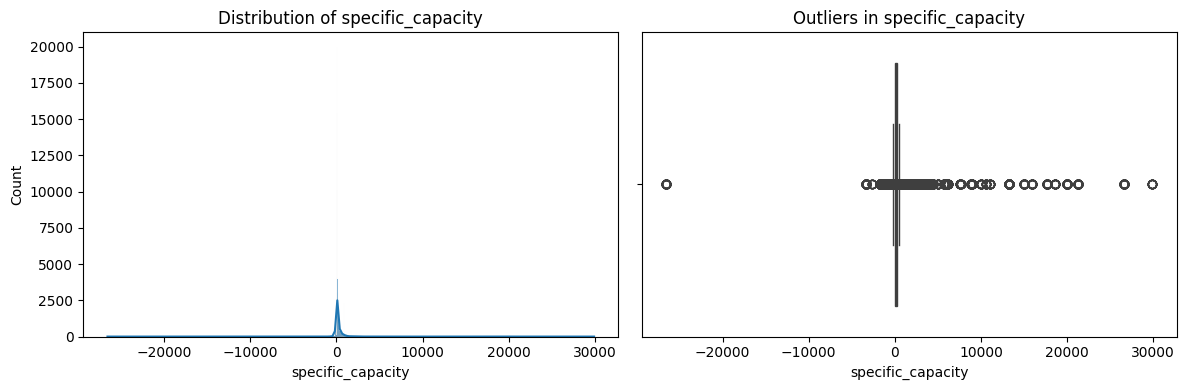

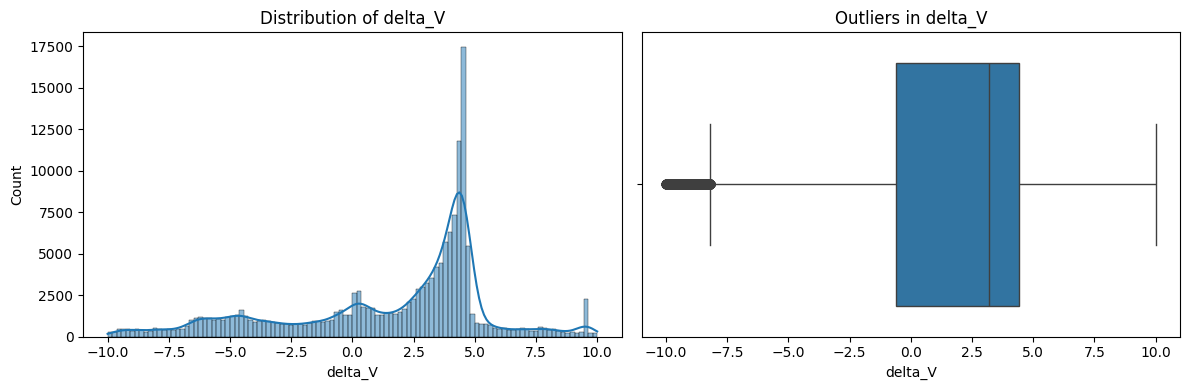

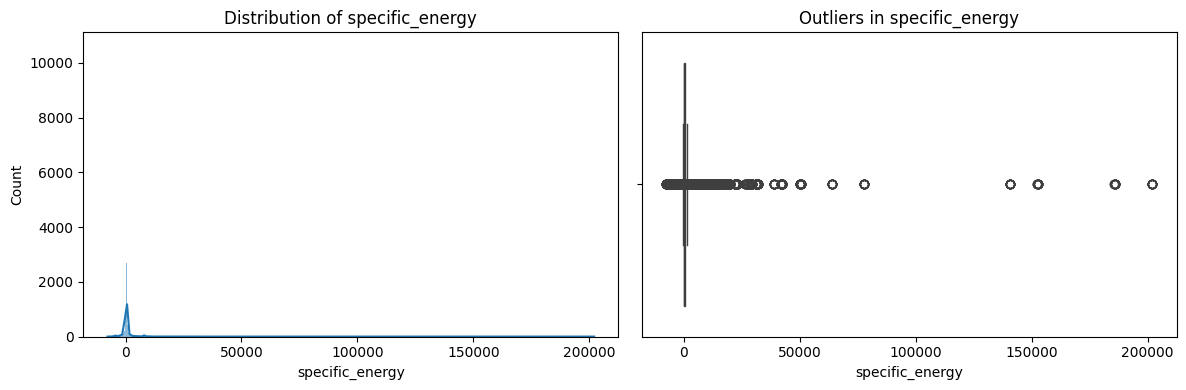

In [24]:
targets = ['specific_capacity', 'delta_V', 'specific_energy']
for col in targets:
    fig, axs = plt.pyplot.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axs[0])
    sns.boxplot(x=df[col], ax=axs[1])
    axs[0].set_title(f"Distribution of {col}")
    axs[1].set_title(f"Outliers in {col}")
    plt.pyplot.tight_layout()
    plt.pyplot.show()

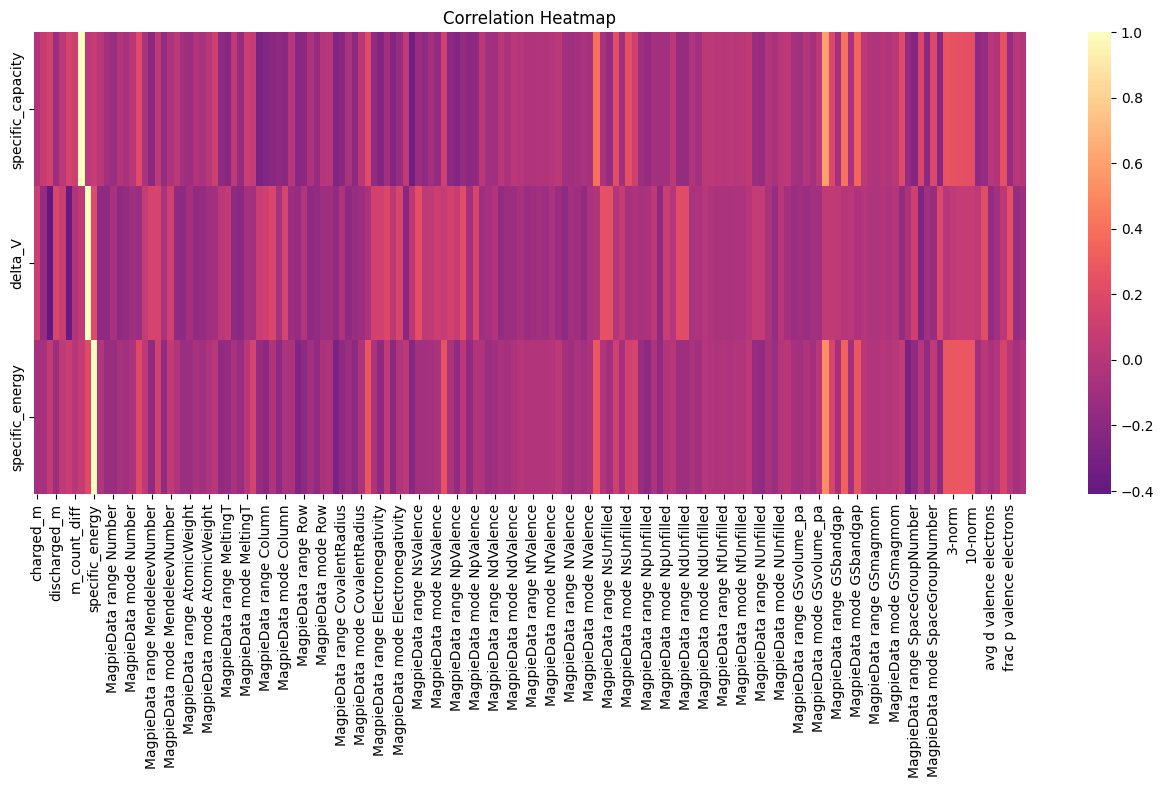

In [25]:
# corr bw input and output features
corr = df[df.select_dtypes(include=[np.number]).columns].corr().loc[targets]

plt.pyplot.figure(figsize=(16, 6));
sns.heatmap(corr, cmap='magma', center=0)
plt.pyplot.title("Correlation Heatmap")
plt.pyplot.show()

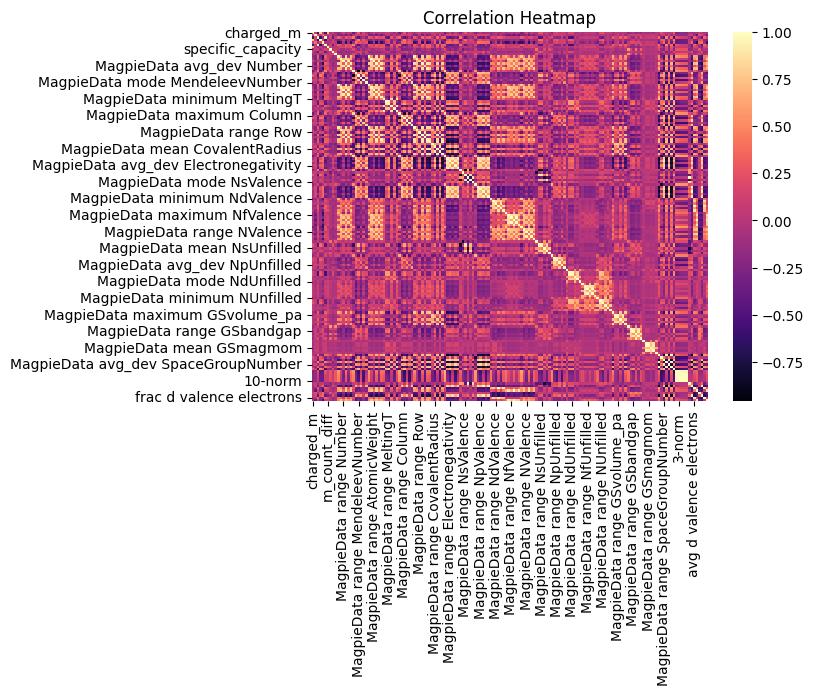

In [26]:
# full corr plot
corr = df[df.select_dtypes(include=[np.number]).columns].corr()
sns.heatmap(corr, cmap='magma', center=0)
plt.pyplot.title("Correlation Heatmap")
plt.pyplot.show()

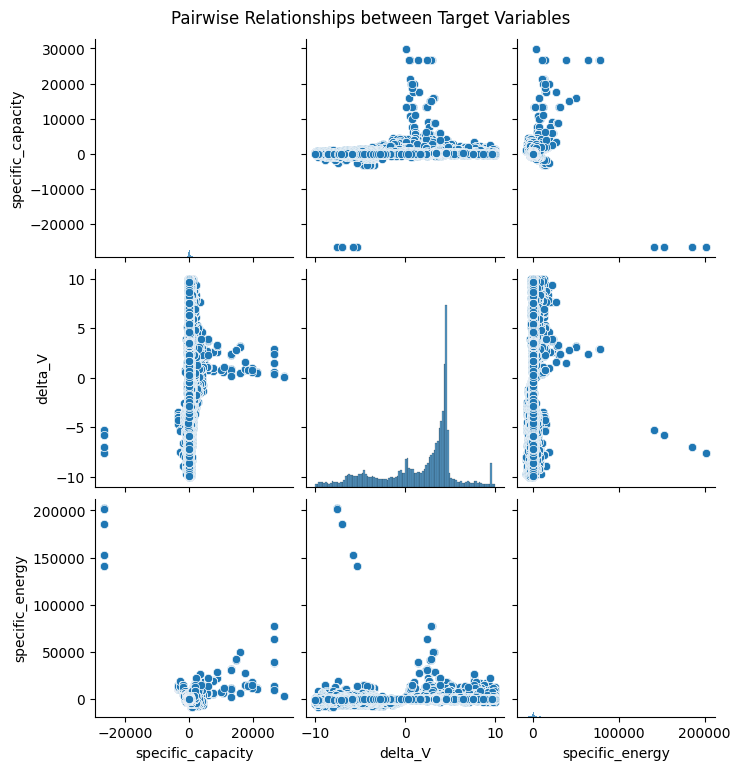

In [27]:
sns.pairplot(df[targets])
plt.pyplot.suptitle("Pairwise Relationships between Target Variables", y=1.02)
plt.pyplot.show()

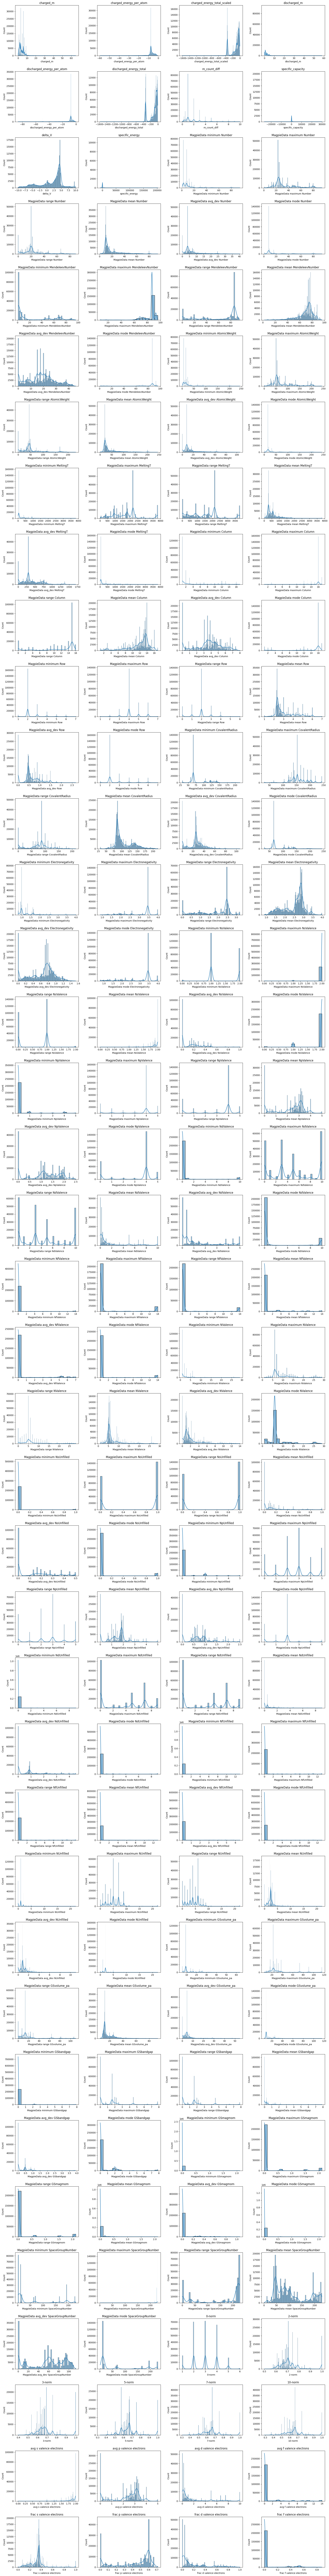

In [28]:
def plot_numeric_distributions(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 4
    n_plots = len(numeric_cols)
    n_rows = math.ceil(n_plots / n_cols)
    fig, axes = plt.pyplot.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()
    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(col)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.pyplot.tight_layout()
    plt.pyplot.show()

plot_numeric_distributions(df)
